## Dataset Description

#  Introduction

## Description of Combined Cycle Power Plant


A combined cycle power plant is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators (HRSG). In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. A gas turbine in a combined cycle system does not only generate the electrical power but also generates fairly hot exhaust. Routing these gases through a water-cooled heat exchanger produces steam, which can be turned into electric power with a coupled steam turbine and generator. Hence, a gas turbine generator generates electricity and waste heat of the exhaust gases is used to produce steam to generate additional electricity via a steam turbine. This type of power plant is being installed in increasing numbers around the world where there is access to substantial quantities of natural gas.

The CCPP, from which the dataset for this study was collected, is designed with a nominal generating capacity of 480 MW, made up of 2 X 160MW ABB 13E2 Gas Turbines, 2 X dual pressure Heat Recovery Steam Generators (HRSG) and 1 X 160MW ABB Steam Turbine as illustrated in the figure given below.


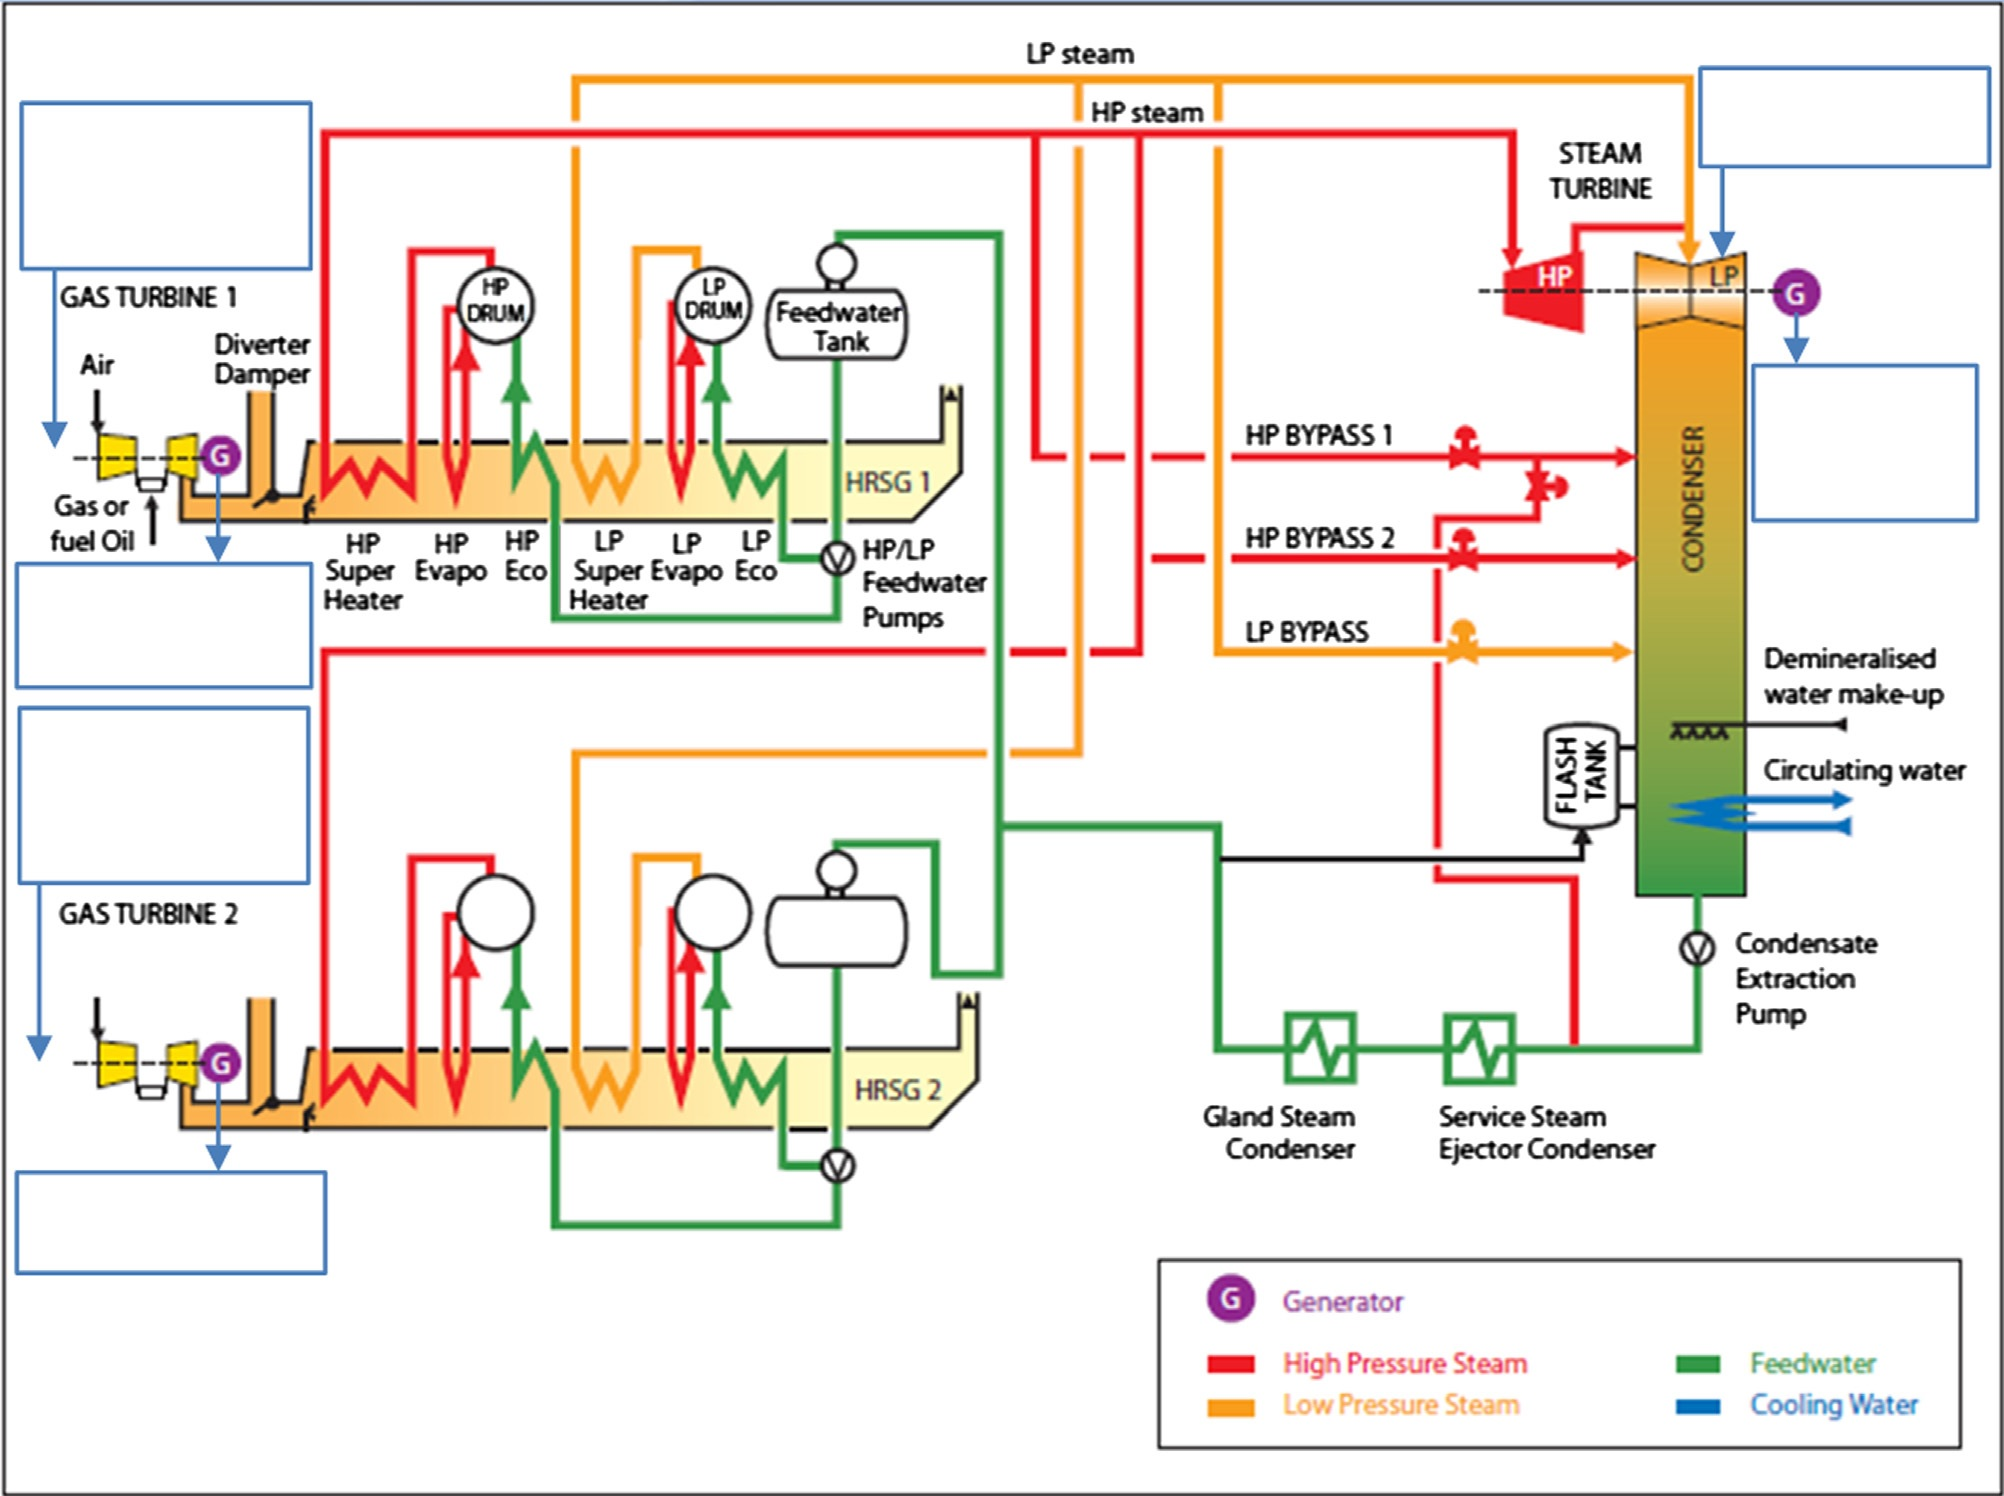




The CCPP, from which the dataset for this study was collected, is designed with a nominal generating capacity of 480 MW, made up of 2 X 160MW ABB 13E2 Gas Turbines, 2 X dual pressure Heat Recovery Steam Generators (HRSG) and 1 X 160MW ABB Steam Turbine as illustrated in tha above figure. 

Gas turbine load is sensitive to the ambient conditions; mainly ambient temperature (AT), atmospheric pressure (AP), and relative humidity (RH).However, steam turbine load is sensitive to the exhaust steam pressure (or vacuum, V). These parameters of both gas and steam turbines, which are related with ambient conditions and exhaust steam pressure, are used as input variables in the dataset of this study. The electrical power generating by both gas and steam turbines is used as a target variable in the dataset. All the input variables and target variable, which are defined as below, correspond to average hourly data received from the measurement points by the sensors also denoted in Figure above.


1.   Ambient Temperature (AT): This input variable is measured in whole degrees in Celsius as it varies between 1.81 degree C and 37.11 degree C.
2.   Atmospheric Pressure (AP): This input variable is measured in units of minibars with the range of 992.89–1033.30 mbar.
3.   Relative Humidity (RH): This variable is measured as a percentage from 25.56% to 100.16%.
4.   Vacuum (Exhaust Steam Pressure, V): This variable is measured in cm Hg with the range of 25.36–81.56 cm Hg.
5.   Full Load Electrical Power Output (PE): PE is used as a target variable in the dataset. It is measured in mega watt with the range of 420.26–495.76 MW.


## Dataset Description

The dataset contains **9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011)**, when the power plant was set to work with full load. Features consist of hourly average ambient variables **Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant**.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

# Exploring the Dataset : Exploratory Data Analysis

Before diving into the graphical representaion of Dataset first we will look at the Descriptive Statistics of the Data. We have used python and some of its high level libraries for genrating graphs and tables.

## Descriptive Statistics

In this section we will look at the **Measures of Central Tendency** (Mean, Median, Mode) and **Measures of Dispersion** (Standard Deviation, Range and Quartiles).

In [1]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math


* We will first import the dataset will be taking a look at the type of the variables we have in the dataset.

In [16]:
df = pd.read_excel('Folds5x2_pp.xlsx') # saving the data in the dataframe
print("First Five Observations are: \n")
df.info()

First Five Observations are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


   **It can be observed that the dataset has all the variables in floating point integer**

* Now we will look the first five obseravations in the data set to get an idea of magnitudes of each variable

In [17]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


* Now, let us dive into some **Descriptive Statistis**

In [20]:
print("\nThe  summary of descriptive statistics of the data is: \n")
df.describe()


The  summary of descriptive statistics of the data is: 



,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


**Though the Descriptive Statistics gives us all the numerical information, they are not enough to get the knowledge of actual distribution of variables. This is where graphs and plots come in role.**

## Adding some extra information in the Dataset

Here, we will be dividing each of the variable 
**Here we will be adding new columns to the dataset which will classify whether the data falls in Low, Medium or High Category.**

**This Low, Medium and High Category is calculated by divinding the Range of Data Equally into 3 Categories**

The Code for the same is as below:

In [25]:
lab = ["Low", "Medium", "High"]
amb_Temp_bins = np.linspace(math.floor(min(df['AT'])), math.ceil(max(df['AT'])),4)
exht_Vac_bins = np.linspace(math.floor(min(df['V'])), math.ceil(max(df['V'])),4)
amb_pres_bins = np.linspace(math.floor(min(df['AP'])), math.ceil(max(df['AP'])),4)
rh_bins = np.linspace(math.floor(min(df['RH'])), math.ceil(max(df['RH'])),4)
pe_bins  = np.linspace(math.floor(min(df['PE'])), math.ceil(max(df['PE'])),4)


df['Amb_Temp'] = pd.cut(df['AT'], bins = amb_Temp_bins, labels = lab )
df['Exht_vac'] = pd.cut(df['V'], bins = exht_Vac_bins, labels = lab )
df['Amb_Pres'] = pd.cut(df['AP'], bins = amb_pres_bins, labels = lab )
df['Rel_Humid'] = pd.cut(df['RH'], bins = rh_bins, labels = lab )
df['Pwr'] = pd.cut(df['PE'], bins = pe_bins, labels = lab )



In [26]:
print("First Five Observations are: \n")
print(df.head())
print("\nThe information about the columns are: \n")
print(df.info())

First Five Observations are: 

      AT      V       AP     RH      PE Amb_Temp Exht_vac Amb_Pres Rel_Humid  \
0  14.96  41.76  1024.07  73.17  463.26   Medium      Low     High    Medium   
1  25.18  62.96  1020.04  59.08  444.37   Medium   Medium     High    Medium   
2   5.11  39.40  1012.16  92.14  488.56      Low      Low   Medium      High   
3  20.86  57.32  1010.24  76.64  446.48   Medium   Medium   Medium      High   
4  10.82  37.50  1009.23  96.62  473.90      Low      Low   Medium      High   

      Pwr  
0  Medium  
1     Low  
2    High  
3  Medium  
4    High  

The information about the columns are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AT         9568 non-null   float64 
 1   V          9568 non-null   float64 
 2   AP         9568 non-null   float64 
 3   RH         9568 non-null   float64 
 4   PE         9568 

In [27]:
#Colors to use
c=['#904C77','#E49AB0','#ECB8A5','#ECCFC3','#78A1BB']

## Visualizations of Ambient Temperature

Text(1.8, 2500, '[25.7, 38.0]')

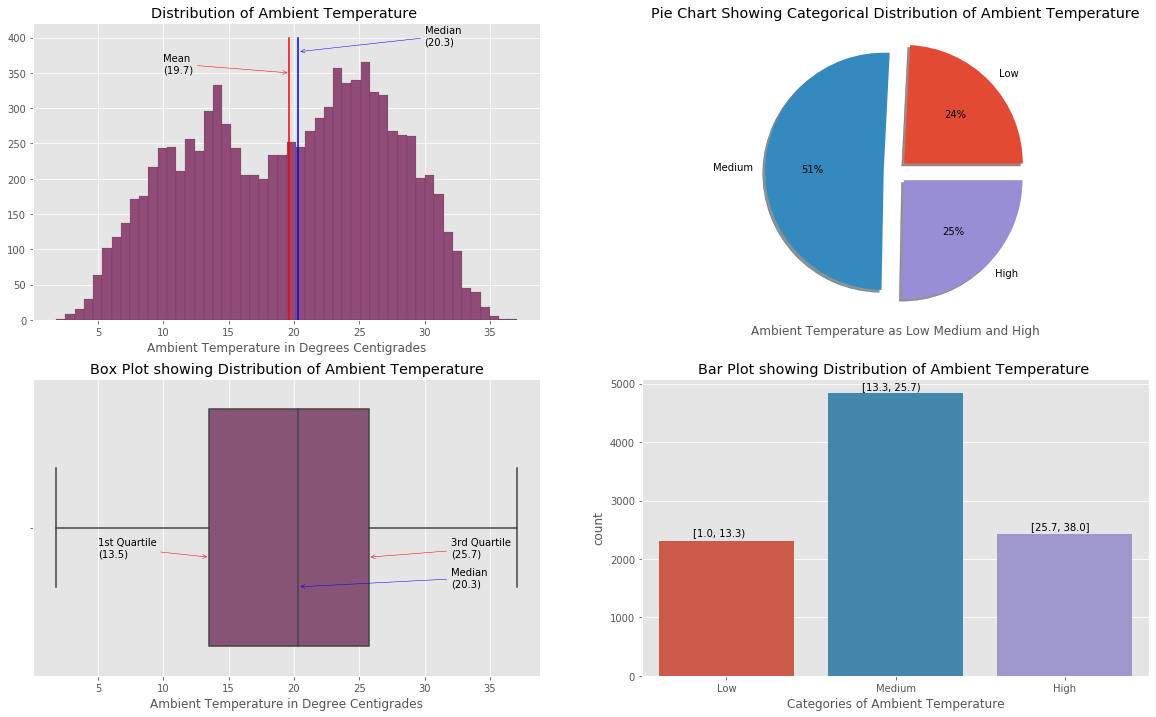

In [52]:
mean_AT = df['AT'].mean()
median_AT = df['AT'].median()
mode_AT = df['AT'].mode()
qnt_1_AT = df['AT'].quantile(0.25)
qnt_3_AT = df['AT'].quantile(0.75)


fig, ax = plt.subplots(2,2, figsize=(20,12))
ax[0,0].hist(df['AT'], bins = 50, color = c[0], linewidth = 0.1, edgecolor = 'black')




ax[0,0].plot([mean_AT, mean_AT, mean_AT], [0, 200, 400], color = 'red' )
ax[0,0].plot([median_AT, median_AT], [0, 400] , color = 'blue')
ax[0,0].annotate(f"Mean\n({round(mean_AT,1)})",xy=(mean_AT, 350), xytext=(10,350), arrowprops={"arrowstyle":"->", "color":"red"})
ax[0,0].annotate(f"Median\n({round(median_AT,1)})",xy=(median_AT, 380), xytext=(30,390), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[0,0].set_title("Distribution of Ambient Temperature ")
ax[0,0].set_xlabel("Ambient Temperature in Degrees Centigrades")


#sns.distplot(df['AT'],ax= ax[0,1], color  = c[0] )
# ax[0,1].plot([mean_AT, mean_AT], [0, 0.05], color = 'red' )
# ax[0,1].plot([median_AT, median_AT], [0, 0.05] , color = 'blue')
# ax[0,1].annotate(f"Mean\n({round(mean_AT,1)})",xy=(mean_AT, 0.045), xytext=(10,0.045), arrowprops={"arrowstyle":"->", "color":"red"})
# ax[0,1].annotate(f"Median\n({round(median_AT,1)})",xy=(median_AT, 0.045), xytext=(30,0.045), arrowprops={"arrowstyle":"->", "color":"blue"})
t_count = df['Amb_Temp'].value_counts()
ax[0,1].pie([t_count[0], t_count[1],t_count[2]], labels=['Low', 'Medium', 'High'], shadow= True, explode = [0.1 , 0.1 , 0.1], autopct = '%1.0f%%')
ax[0,1].set_title("Pie Chart Showing Categorical Distribution of Ambient Temperature")
ax[0,1].set_xlabel("Ambient Temperature as Low Medium and High")


sns.boxplot(df['AT'],ax= ax[1,0], color = c[0] )
ax[1,0].annotate(f"1st Quartile\n({round(qnt_1_AT,1)})",xy=(qnt_1_AT, 0.1), xytext=(5,0.1), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1,0].annotate(f"3rd Quartile\n({round(qnt_3_AT,1)})",xy=(qnt_3_AT, 0.1), xytext=(32,0.1), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1,0].annotate(f"Median\n({round(median_AT,1)})",xy=(median_AT, 0.2), xytext=(32,0.2), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[1,0].set_title("Box Plot showing Distribution of Ambient Temperature")
ax[1,0].set_xlabel("Ambient Temperature in Degree Centigrades")


sns.countplot(df['Amb_Temp'], ax = ax[1,1])
ax[1,1].set_title("Bar Plot showing Distribution of Ambient Temperature ")
ax[1,1].set_xlabel("Categories of Ambient Temperature")
ax[1,1].annotate(f"[{round(amb_Temp_bins[0],1)}, {round(amb_Temp_bins[1],1)})", xy=(-0.2,2400))
ax[1,1].annotate(f"[{round(amb_Temp_bins[1],1)}, {round(amb_Temp_bins[2],1)})", xy=(0.8,4900))
ax[1,1].annotate(f"[{round(amb_Temp_bins[2],1)}, {round(amb_Temp_bins[3],1)}]", xy=(1.8,2500))





**It can be obserbed from the histogram and Kernal Density Estimate plot that the Distribution of the Ambient Temperature is more or less bimodal. Mean and Median lie very close to each other. However, the box and wiskers graph fails to capture this bimodal trend. It just depicts that the data is almost eqaully spread of values on the both side of median.**

**The bar plot just show the distribution of values in each category. It shows that most of the values fall in the Medium Category which is described by the interval [13.3, 25.7). It fails to capture any other information.**

## Visualizations of Relative Humidity

0    100.09
dtype: float64


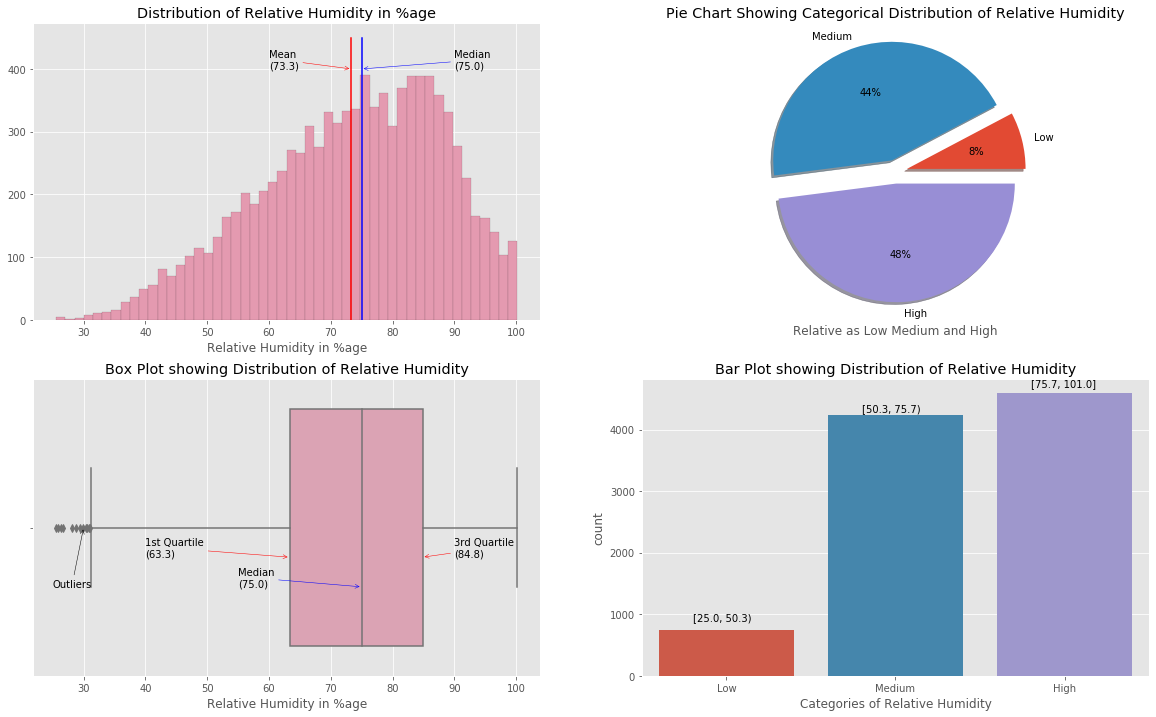

In [53]:
mean_RH = df['RH'].mean()
median_RH = df['RH'].median()
mode_RH = df['RH'].mode()
qnt_1_RH = df['RH'].quantile(0.25)
qnt_3_RH = df['RH'].quantile(0.75)


fig, ax = plt.subplots(2,2, figsize=(20,12))
ax[0,0].hist(df['RH'], bins = 50, color = c[1], linewidth = 0.1, edgecolor = 'black')




ax[0,0].plot([mean_RH, mean_RH], [0, 450], color = 'red' )
ax[0,0].plot([median_RH, median_RH], [0, 450] , color = 'blue')
ax[0,0].annotate(f"Mean\n({round(mean_RH,1)})",xy=(mean_RH, 400), xytext=(60,400), arrowprops={"arrowstyle":"->", "color":"red"})
ax[0,0].annotate(f"Median\n({round(median_RH,1)})",xy=(median_RH, 400), xytext=(90,400), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[0,0].set_title("Distribution of Relative Humidity in %age")
ax[0,0].set_xlabel("Relative Humidity in %age")


# sns.kdeplot(df['RH'],ax= ax[0,1], color  = c[1] )
# ax[0,1].plot([mean_RH, mean_RH], [0, 0.028], color = 'red' )
# ax[0,1].plot([median_RH, median_RH], [0, 0.028] , color = 'blue')
# ax[0,1].annotate(f"Mean\n({round(mean_RH,1)})",xy=(mean_RH, 0.025), xytext=(60,0.025), arrowprops={"arrowstyle":"->", "color":"red"})
# ax[0,1].annotate(f"Median\n({round(median_RH,1)})",xy=(median_RH, 0.025), xytext=(90,0.025), arrowprops={"arrowstyle":"->", "color":"blue"})
rh_count = df['Rel_Humid'].value_counts()
ax[0,1].pie([rh_count[0], rh_count[1],rh_count[2]], labels=['Low', 'Medium', 'High'], shadow= True, explode = [0.1 , 0.1 , 0.1], autopct = '%1.0f%%')
ax[0,1].set_title("Pie Chart Showing Categorical Distribution of Relative Humidity")
ax[0,1].set_xlabel("Relative as Low Medium and High")



sns.boxplot(df['RH'],ax= ax[1,0], color  = c[1]  )
ax[1,0].annotate(f"1st Quartile\n({round(qnt_1_RH,1)})",xy=(qnt_1_RH, 0.1), xytext=(40,0.1), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1,0].annotate(f"3rd Quartile\n({round(qnt_3_RH,1)})",xy=(qnt_3_RH, 0.1), xytext=(90,0.1), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1,0].annotate(f"Median\n({round(median_RH,1)})",xy=(median_RH, 0.2), xytext=(55,0.2), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[1,0].annotate("Outliers",xy=(30, 0), xytext=(25,0.2), arrowprops={"arrowstyle":"->", "color":"black"})
ax[1,0].set_title("Box Plot showing Distribution of Relative Humidity")
ax[1,0].set_xlabel("Relative Humidity in %age")


sns.countplot(df['Rel_Humid'], ax = ax[1,1])
ax[1,1].set_title("Bar Plot showing Distribution of Relative Humidity")
ax[1,1].set_xlabel("Categories of Relative Humidity")
ax[1,1].annotate(f"[{round(rh_bins[0],1)}, {round(rh_bins[1],1)})", xy=(-0.2,900))
ax[1,1].annotate(f"[{round(rh_bins[1],1)}, {round(rh_bins[2],1)})", xy=(0.8,4300))
ax[1,1].annotate(f"[{round(rh_bins[2],1)}, {round(rh_bins[3],1)}]", xy=(1.8,4700))


print(df['RH'].mode())

**It can be observed from the above given Histogram, KDE plot and box plot that the Distribution of Relative Humidity is negatively skewed. This can also be verified from the fact that the mean is less than the median.**

**The box is also able to capture some of the outliers that fall below the value 31**

**The bar graph on the lower right corner shows that the values are almost equally ditributed in Mediuma and High Category while very less value lies Low Relative Humidity band**

## Visualizations of Exhaust Vacuum

Text(1.8, 3250, '[63.0, 82.0]')

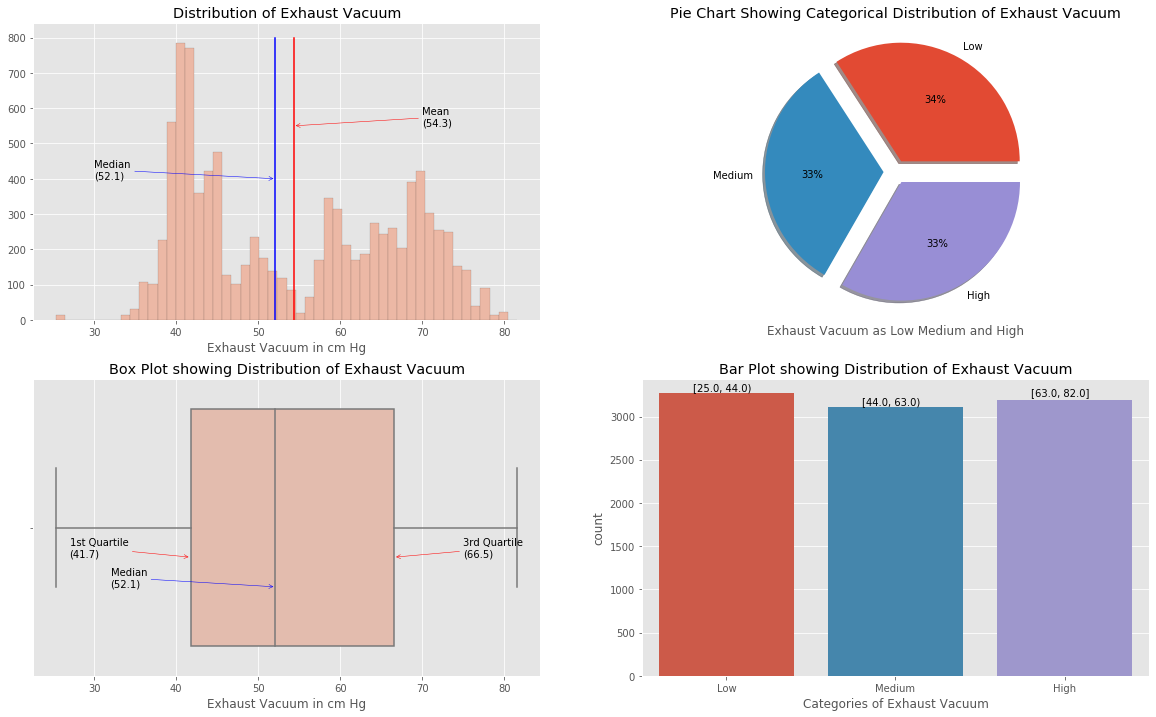

In [54]:


mean_V = df['V'].mean()
median_V = df['V'].median()
mode_V = df['V'].mode()
qnt_1_V = df['V'].quantile(0.25)
qnt_3_V = df['V'].quantile(0.75)


fig, ax = plt.subplots(2,2, figsize=(20,12))
ax[0,0].hist(df['V'], bins = 50, color = c[2], linewidth = 0.1, edgecolor = 'black')




ax[0,0].plot([mean_V, mean_V], [0, 800], color = 'red' )
ax[0,0].plot([median_V, median_V], [0, 800] , color = 'blue')
ax[0,0].annotate(f"Mean\n({round(mean_V,1)})",xy=(mean_V, 550), xytext=(70,550), arrowprops={"arrowstyle":"->", "color":"red"})
ax[0,0].annotate(f"Median\n({round(median_V,1)})",xy=(median_V, 400), xytext=(30,400), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[0,0].set_title("Distribution of Exhaust Vacuum")
ax[0,0].set_xlabel("Exhaust Vacuum in cm Hg")


# sns.kdeplot(df['V'],ax= ax[0,1], color  = c[2] )
# ax[0,1].plot([mean_V, mean_V], [0, 0.05], color = 'red' )
# ax[0,1].plot([median_V, median_V], [0, 0.05] , color = 'blue')
# ax[0,1].annotate(f"Mean\n({round(mean_V,1)})",xy=(mean_V, 0.045), xytext=(70,0.045), arrowprops={"arrowstyle":"->", "color":"red"})
# ax[0,1].annotate(f"Median\n({round(median_V,1)})",xy=(median_V, 0.045), xytext=(30,0.045), arrowprops={"arrowstyle":"->", "color":"blue"})
# ax[0,1].set_title("Kernal Denisty Estimate of Exhaust Vacuum")
# ax[0,1].set_xlabel("Exhaust Vacuum in cm Hg")
v_count = df['Exht_vac'].value_counts()
ax[0,1].pie([v_count[0], v_count[1],v_count[2]], labels=['Low', 'Medium', 'High'], shadow= True, explode = [0.1 , 0.1 , 0.1], autopct = '%1.0f%%')
ax[0,1].set_title("Pie Chart Showing Categorical Distribution of Exhaust Vacuum")
ax[0,1].set_xlabel("Exhaust Vacuum as Low Medium and High")


sns.boxplot(df['V'],ax= ax[1,0] , color  = c[2] )
ax[1,0].annotate(f"1st Quartile\n({round(qnt_1_V,1)})",xy=(qnt_1_V, 0.1), xytext=(27,0.1), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1,0].annotate(f"3rd Quartile\n({round(qnt_3_V,1)})",xy=(qnt_3_V, 0.1), xytext=(75,0.1), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1,0].annotate(f"Median\n({round(median_V,1)})",xy=(median_V, 0.2), xytext=(32,0.2), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[1,0].set_title("Box Plot showing Distribution of Exhaust Vacuum")
ax[1,0].set_xlabel("Exhaust Vacuum in cm Hg")


sns.countplot(df['Exht_vac'], ax = ax[1,1])
ax[1,1].set_title("Bar Plot showing Distribution of Exhaust Vacuum")
ax[1,1].set_xlabel("Categories of Exhaust Vacuum")
ax[1,1].annotate(f"[{round(exht_Vac_bins[0],1)}, {round(exht_Vac_bins[1],1)})", xy=(-0.2,3300))
ax[1,1].annotate(f"[{round(exht_Vac_bins[1],1)}, {round(exht_Vac_bins[2],1)})", xy=(0.8,3140))
ax[1,1].annotate(f"[{round(exht_Vac_bins[2],1)}, {round(exht_Vac_bins[3],1)}]", xy=(1.8,3250))


## Visualizations of Ambient Pressure

Text(1.8, 1400, '[1020.0, 1034.0]')

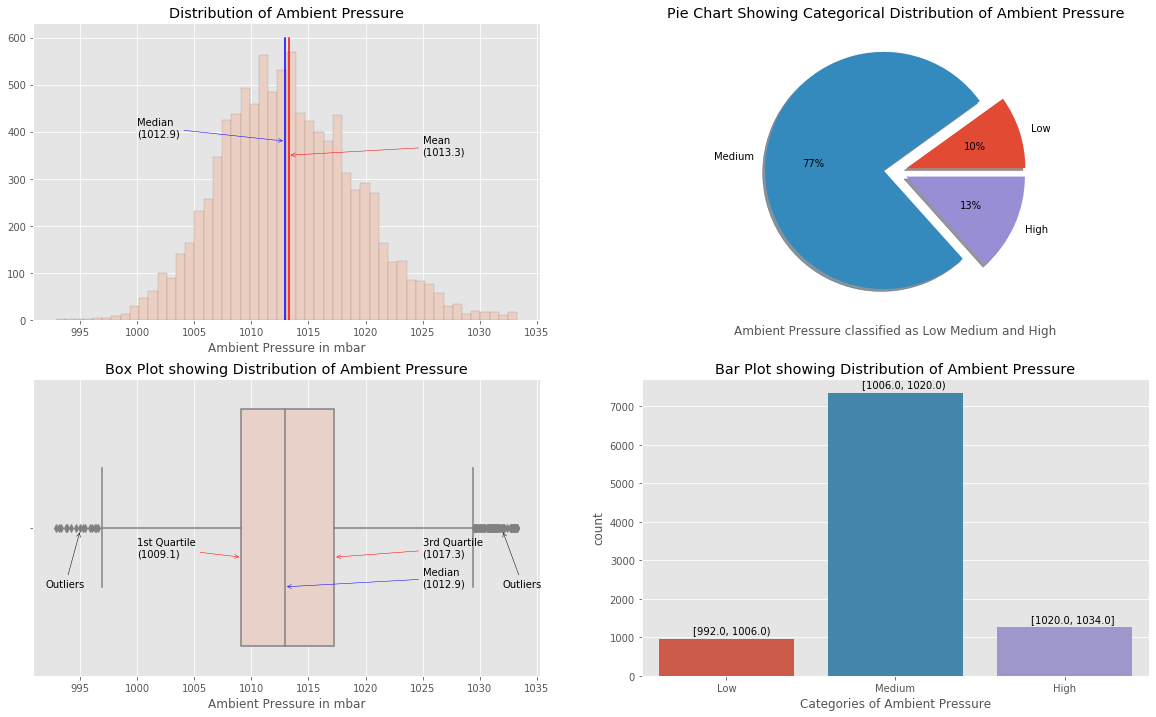

In [57]:
mean_AP = df['AP'].mean()
median_AP = df['AP'].median()
mode_AP = df['AP'].mode()
qnt_1_AP = df['AP'].quantile(0.25)
qnt_3_AP = df['AP'].quantile(0.75)


fig, ax = plt.subplots(2,2, figsize=(20,12))
ax[0,0].hist(df['AP'], bins = 50, color  = c[3] , linewidth = 0.1, edgecolor = 'black')




ax[0,0].plot([mean_AP, mean_AP, mean_AP], [0, 200, 600], color = 'red' )
ax[0,0].plot([median_AP, median_AP], [0, 600] , color = 'blue')
ax[0,0].annotate(f"Mean\n({round(mean_AP,1)})",xy=(mean_AP, 350), xytext=(1025,350), arrowprops={"arrowstyle":"->", "color":"red"})
ax[0,0].annotate(f"Median\n({round(median_AP,1)})",xy=(median_AP, 380), xytext=(1000,390), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[0,0].set_title("Distribution of Ambient Pressure")
ax[0,0].set_xlabel("Ambient Pressure in mbar")


# sns.kdeplot(df['AP'],ax= ax[0,1], color  = c[3] )
# ax[0,1].plot([mean_AP, mean_AP], [0, 0.07], color = 'red' )
# ax[0,1].plot([median_AP, median_AP], [0, 0.07] , color = 'blue')
# ax[0,1].annotate(f"Mean\n({round(mean_AP,1)})",xy=(mean_AP, 0.045), xytext=(1025,0.045), arrowprops={"arrowstyle":"->", "color":"red"})
# ax[0,1].annotate(f"Median\n({round(median_AP,1)})",xy=(median_AP, 0.045), xytext=(1000,0.045), arrowprops={"arrowstyle":"->", "color":"blue"})
# ax[0,1].set_title("Kernal Denisty Estimate of Ambient Pressure")
# ax[0,1].set_xlabel("Ambient Pressure in mbar")
ap_count = df['Amb_Pres'].value_counts()
ax[0,1].pie([ap_count[0], ap_count[1],ap_count[2]], labels=['Low', 'Medium', 'High'], shadow= True, explode = [0.1 , 0.1 , 0.1], autopct = '%1.0f%%')
ax[0,1].set_title("Pie Chart Showing Categorical Distribution of Ambient Pressure")
ax[0,1].set_xlabel("Ambient Pressure classified as Low Medium and High")


sns.boxplot(df['AP'],ax= ax[1,0], color  = c[3]  )
ax[1,0].annotate(f"1st Quartile\n({round(qnt_1_AP,1)})",xy=(qnt_1_AP, 0.1), xytext=(1000,0.1), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1,0].annotate(f"3rd Quartile\n({round(qnt_3_AP,1)})",xy=(qnt_3_AP, 0.1), xytext=(1025,0.1), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1,0].annotate(f"Median\n({round(median_AP,1)})",xy=(median_AP, 0.2), xytext=(1025,0.2), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[1,0].annotate("Outliers",xy=(995, 0.01), xytext=(992,0.2), arrowprops={"arrowstyle":"->", "color":"black"})
ax[1,0].annotate("Outliers",xy=(1032, 0.01), xytext=(1032,0.2), arrowprops={"arrowstyle":"->", "color":"black"})
ax[1,0].set_title("Box Plot showing Distribution of Ambient Pressure")
ax[1,0].set_xlabel("Ambient Pressure in mbar")


sns.countplot(df['Amb_Pres'], ax = ax[1,1])
ax[1,1].set_title("Bar Plot showing Distribution of Ambient Pressure")
ax[1,1].set_xlabel("Categories of Ambient Pressure")
ax[1,1].annotate(f"[{round(amb_pres_bins[0],1)}, {round(amb_pres_bins[1],1)})", xy=(-0.2,1100))
ax[1,1].annotate(f"[{round(amb_pres_bins[1],1)}, {round(amb_pres_bins[2],1)})", xy=(0.8,7500))
ax[1,1].annotate(f"[{round(amb_pres_bins[2],1)}, {round(amb_pres_bins[3],1)}]", xy=(1.8,1400))



## Visualizations of Power output

Text(1.8, 2200, '[470.7, 496.0]')

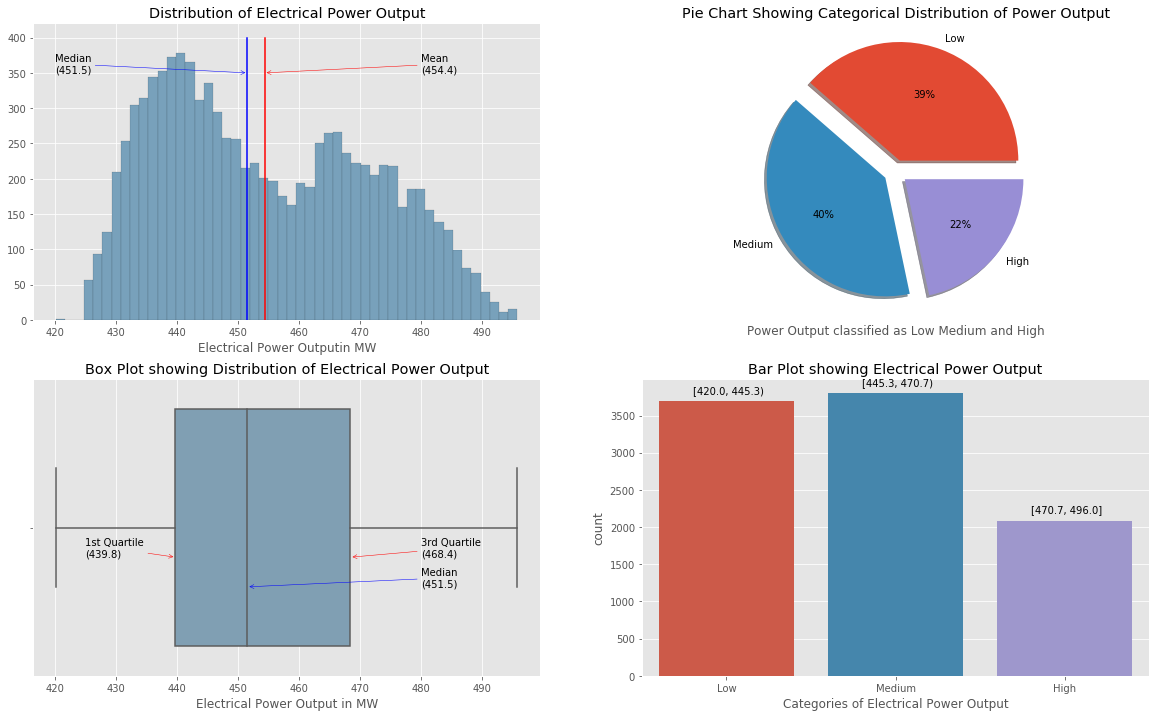

In [60]:
mean_PE = df['PE'].mean()
median_PE = df['PE'].median()
mode_PE = df['PE'].mode()
qnt_1_PE = df['PE'].quantile(0.25)
qnt_3_PE = df['PE'].quantile(0.75)


fig, ax = plt.subplots(2,2, figsize=(20,12))
ax[0,0].hist(df['PE'], bins = 50, color  = c[4] , linewidth = 0.1, edgecolor = 'black')




ax[0,0].plot([mean_PE, mean_PE, mean_PE], [0, 200, 400], color = 'red' )
ax[0,0].plot([median_PE, median_PE], [0, 400] , color = 'blue')
ax[0,0].annotate(f"Mean\n({round(mean_PE,1)})",xy=(mean_PE, 350), xytext=(480,350), arrowprops={"arrowstyle":"->", "color":"red"})
ax[0,0].annotate(f"Median\n({round(median_PE,1)})",xy=(median_PE, 350), xytext=(420,350), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[0,0].set_title("Distribution of Electrical Power Output")
ax[0,0].set_xlabel("Electrical Power Outputin MW")


# sns.kdeplot(df['PE'],ax= ax[0,1], color  = c[4] )
# ax[0,1].plot([mean_PE, mean_PE], [0, 0.03], color = 'red' )
# ax[0,1].plot([median_PE, median_PE], [0, 0.03] , color = 'blue')
# ax[0,1].annotate(f"Mean\n({round(mean_PE,1)})",xy=(mean_PE, 0.025), xytext=(480,0.025), arrowprops={"arrowstyle":"->", "color":"red"})
# ax[0,1].annotate(f"Median\n({round(median_PE,1)})",xy=(median_PE, 0.025), xytext=(420,0.025), arrowprops={"arrowstyle":"->", "color":"blue"})
# ax[0,1].set_title("Kernal Denisty Estimate of Electrical Power Output")
# ax[0,1].set_xlabel("Electrical Power Output in MW")
pe_count = df['Pwr'].value_counts()
ax[0,1].pie([pe_count[0], pe_count[1],pe_count[2]], labels=['Low', 'Medium', 'High'], shadow= True, explode = [0.1 , 0.1 , 0.1], autopct = '%1.0f%%')
ax[0,1].set_title("Pie Chart Showing Categorical Distribution of Power Output")
ax[0,1].set_xlabel("Power Output classified as Low Medium and High")

sns.boxplot(df['PE'],ax= ax[1,0], color  = c[4]  )
ax[1,0].annotate(f"1st Quartile\n({round(qnt_1_PE,1)})",xy=(qnt_1_PE, 0.1), xytext=(425,0.1), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1,0].annotate(f"3rd Quartile\n({round(qnt_3_PE,1)})",xy=(qnt_3_PE, 0.1), xytext=(480,0.1), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1,0].annotate(f"Median\n({round(median_PE,1)})",xy=(median_PE, 0.2), xytext=(480,0.2), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[1,0].set_title("Box Plot showing Distribution of Electrical Power Output")
ax[1,0].set_xlabel("Electrical Power Output in MW")


sns.countplot(df['Pwr'], ax = ax[1,1])
ax[1,1].set_title("Bar Plot showing Electrical Power Output")
ax[1,1].set_xlabel("Categories of Electrical Power Output")
ax[1,1].annotate(f"[{round(pe_bins[0],1)}, {round(pe_bins[1],1)})", xy=(-0.2,3800))
ax[1,1].annotate(f"[{round(pe_bins[1],1)}, {round(pe_bins[2],1)})", xy=(0.8,3900))
ax[1,1].annotate(f"[{round(pe_bins[2],1)}, {round(pe_bins[3],1)}]", xy=(1.8,2200))

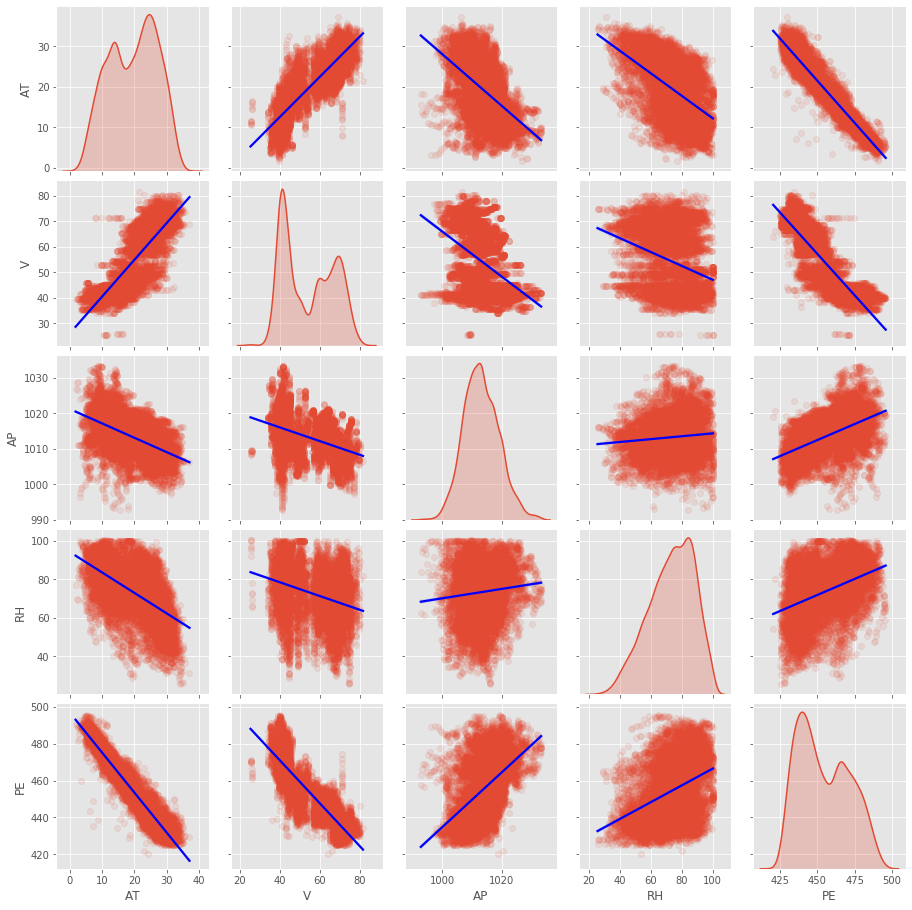

In [12]:

sns.pairplot(df, diag_kind='kde',kind='reg', plot_kws={'line_kws':{'color':'blue'}, 'scatter_kws': {'alpha': 0.1}})


In [13]:
sns

<module 'seaborn' from 'C:\\Users\\Arpit\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>